In [173]:
import json

In [174]:
with open('../data/results.json') as file:
    data = json.load(file)

In [175]:
total_ran_in = data["ran_in"]
print(f"Ran in {round(total_ran_in / 3600, 2)} hours")

Ran in 2.01 hours


In [176]:
def get_avg(nums, with_empty_check=False):
  if with_empty_check:
    if len(nums) == 0:
      return 0
  return round(sum(nums) / len(nums), 2)

In [177]:
# dig
dig_query_times = []
dig_ran_in_times = []
for d in data["data"]:
  dig_query_time_ms = d["dig"]["query_time_ms"]
  dig_query_times.append(dig_query_time_ms)
  
  dig_ran_in = d["dig"]["ran_in"]
  dig_ran_in_times.append(dig_ran_in)
  
print(
    f"average dig ran_in: {get_avg(dig_ran_in_times)} ms")
  
print(
    f"average dig query time: {get_avg(dig_query_times)} ms")

average dig ran_in: 0.15 ms
average dig query time: 122.87 ms


In [181]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Frequency')

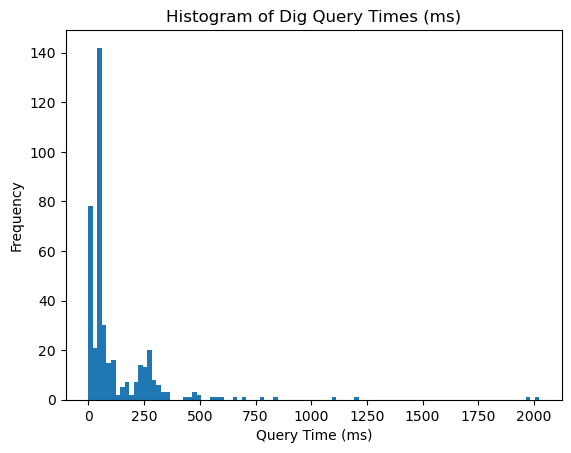

In [193]:
plt.hist(dig_query_times, bins=100)
plt.title("Histogram of Dig Query Times (ms)")
plt.xlabel("Query Time (ms)")
plt.ylabel("Frequency")

In [165]:
# ping
ping_packet_loss_ptcs = []
ping_rt_mins = []
ping_rt_avgs = []
ping_rt_maxs = []
ping_rt_stddevs = []
ping_ran_in_times = []

for d in data["data"]:
  ping_packet_loss_pct = d["ping"]["packet_loss_percent"]
  ping_packet_loss_ptcs.append(ping_packet_loss_pct)

  ping_rt_min = d["ping"]["round_trip_ms_min"]
  ping_rt_mins.append(ping_rt_min)
  
  ping_rt_avg = d["ping"]["round_trip_ms_avg"]
  ping_rt_avgs.append(ping_rt_avg)
  
  ping_rt_max = d["ping"]["round_trip_ms_max"]
  ping_rt_maxs.append(ping_rt_max)
  
  ping_rt_stddev = d["ping"]["round_trip_ms_stddev"]
  ping_rt_stddevs.append(ping_rt_stddev)
  
  ping_ran_in = d["ping"]["ran_in"]
  ping_ran_in_times.append(ping_ran_in)

print(
    f"average ping ran_in: {get_avg(ping_ran_in_times)} ms")

print(
    f"average ping packet loss pct: {get_avg(ping_packet_loss_ptcs)}%")

print(
    f"average ping rt min: {get_avg(ping_rt_mins)} ms")

print(
    f"average ping rt avg: {get_avg(ping_rt_avgs)} ms")

print(
    f"average ping rt max: {get_avg(ping_rt_maxs)} ms")

print(
    f"average ping rt stddev: {get_avg(ping_rt_stddevs)} ms")

average ping ran_in: 6.16 ms
average ping packet loss pct: 0.28%
average ping rt min: 77.29 ms
average ping rt avg: 79.71 ms
average ping rt max: 97.76 ms
average ping rt stddev: 4.42 ms


Text(0, 0.5, 'Frequency')

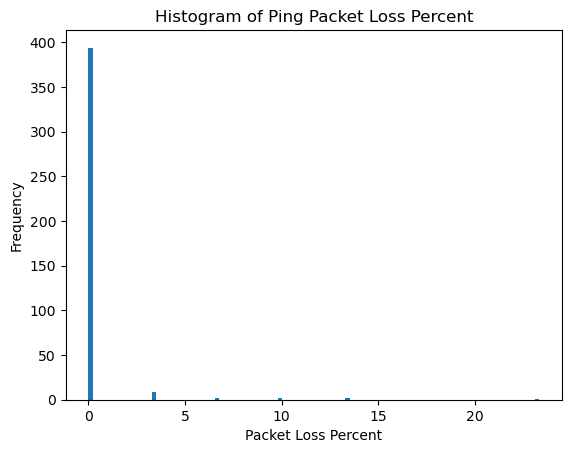

In [192]:
plt.hist(ping_packet_loss_ptcs, bins=100)
plt.title("Histogram of Ping Packet Loss Percent")
plt.xlabel("Packet Loss Percent")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

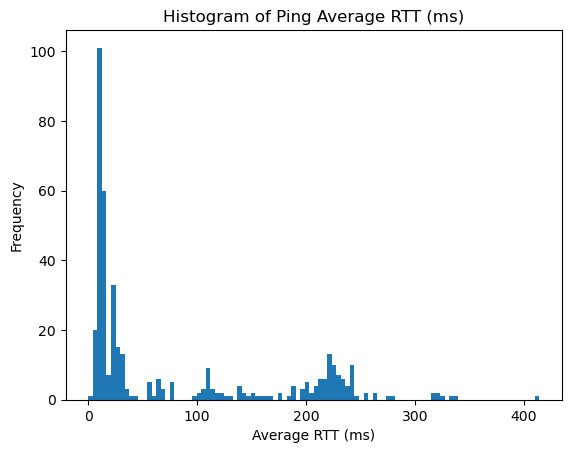

In [191]:
plt.hist(ping_rt_avgs, bins=100)
plt.title("Histogram of Ping Average RTT (ms)")
plt.xlabel("Average RTT (ms)")
plt.ylabel("Frequency")

In [166]:
# traceroute
traceroute_hops = []
traceroute_ran_in_times = []
avg_rtts = []
avg_drops = []

for d in data["data"]:
  traceroute_ran_in = d["traceroute"]["ran_in"]
  traceroute_ran_in_times.append(traceroute_ran_in)

  traceroute_hop = d["traceroute"]["hops"]
  traceroute_hops.append(traceroute_hop)
  
  curr_rtts = []
  curr_drops = 0
  for rtt in d["traceroute"]["rtts"]:
    if len(rtt) > 0:
      avg_rtt = sum(rtt) / len(rtt)
    else:
      curr_drops += 1
      
    curr_rtts.append(round(avg_rtt, 2))
    
  avg_rtts.append(get_avg(curr_rtts))
  avg_drops.append(round(curr_drops / traceroute_hop, 2) * 100)
  

print(
    f"average traceroute ran_in: {get_avg(traceroute_ran_in_times)} ms")

print(
    f"average traceroute hops: {get_avg(traceroute_hops)}")

print(
    f"average traceroute drop pct: {get_avg(avg_drops)}%")


average traceroute ran_in: 8.12 ms
average traceroute hops: 24.66
average traceroute drop pct: 19.52%


Text(0, 0.5, 'Frequency')

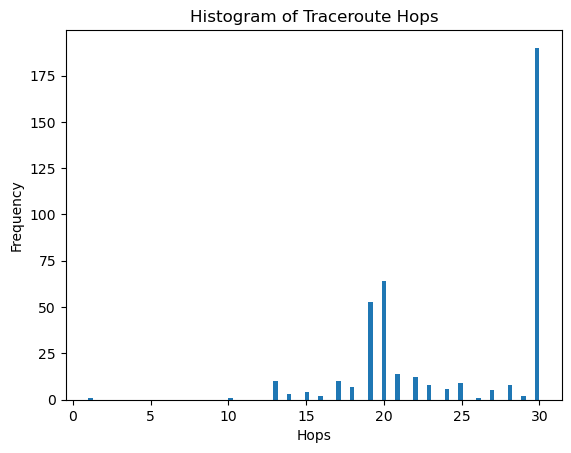

In [194]:
plt.hist(traceroute_hops, bins=100)
plt.title("Histogram of Traceroute Hops")
plt.xlabel("Hops")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

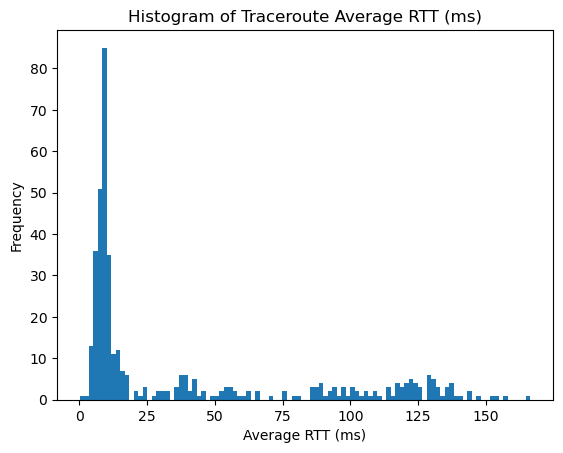

In [195]:
plt.hist(avg_rtts, bins=100)
plt.title("Histogram of Traceroute Average RTT (ms)")
plt.xlabel("Average RTT (ms)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

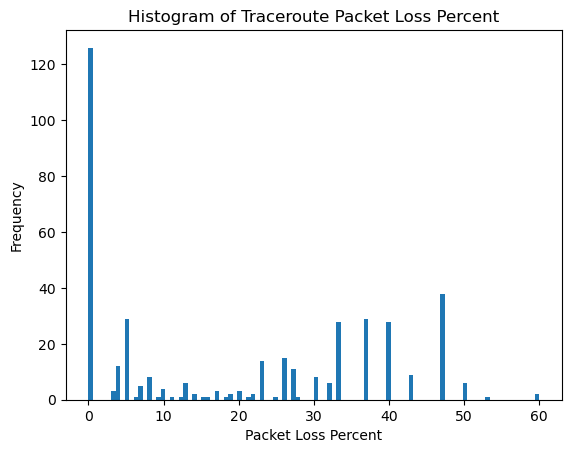

In [197]:
plt.hist(avg_drops, bins=100)
plt.title("Histogram of Traceroute Packet Loss Percent")
plt.xlabel("Packet Loss Percent")
plt.ylabel("Frequency")


In [170]:
avg_diffs = []
for d in data["data"]:
  curr_diffs = []
  for i in range(1, len(d["traceroute"]["rtts"])):
    prev, curr = d["traceroute"]["rtts"][i-1], d["traceroute"]["rtts"][i]
    
    prev_avg_rtt = get_avg(prev, True)
    curr_avg_rtt = get_avg(curr, True)
    
    curr_diffs.append(round(curr_avg_rtt - prev_avg_rtt, 2))
    
  avg_diffs.append(get_avg(curr_diffs, True))
  
print(f"Avg rtt hop diff: {get_avg(avg_diffs)} ms")

Avg rtt hop diff: 1.14 ms


Text(0, 0.5, 'Frequency')

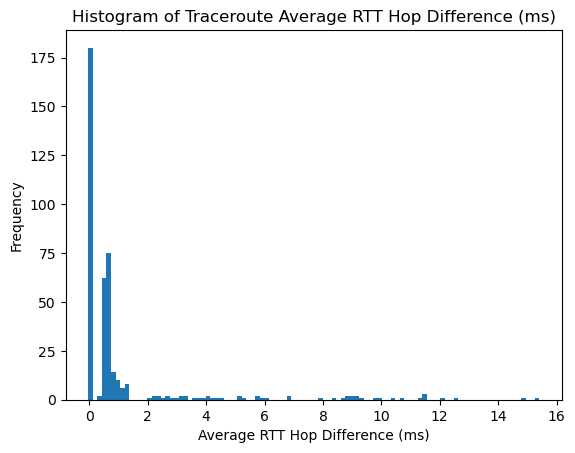

In [198]:
plt.hist(avg_diffs, bins=100)
plt.title("Histogram of Traceroute Average RTT Hop Difference (ms)")
plt.xlabel("Average RTT Hop Difference (ms)")
plt.ylabel("Frequency")